# Лабораторная работа: Кластеризация и снижение размерности

Используем датасет **Iris** (без целевого признака). Задача — сравнить разные методы снижения размерности и кластеризации.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris(as_frame=True)
df = iris.frame
D1 = df.drop(columns=['target'])  # убираем целевой признак
D1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Снижение размерности: PCA и t-SNE

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
D3 = tsne.fit_transform(D1)

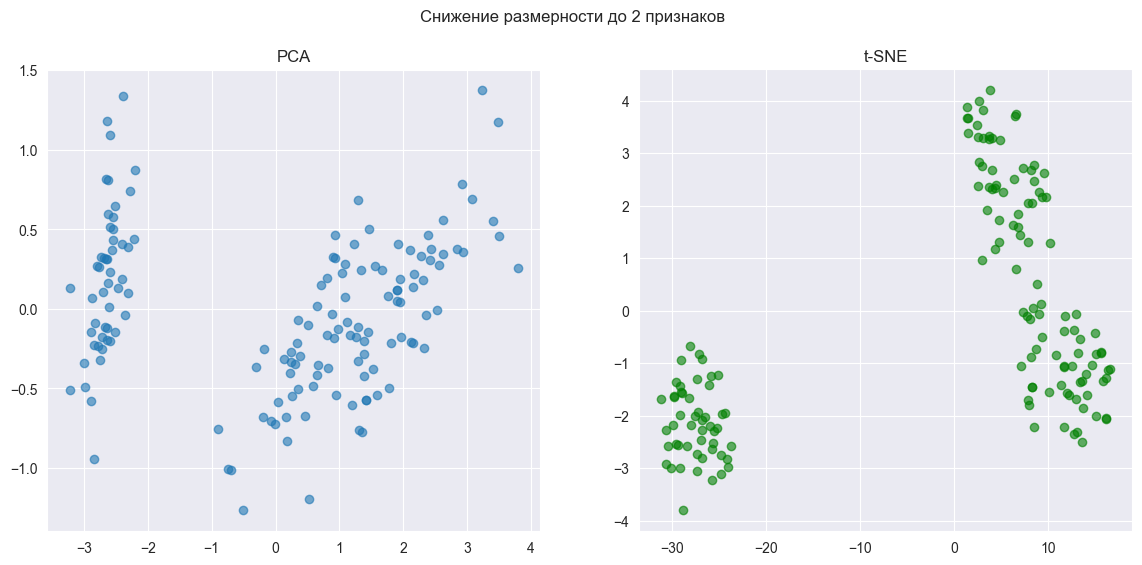

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(D2[:, 0], D2[:, 1], alpha=0.6)
axes[0].set_title('PCA')
axes[1].scatter(D3[:, 0], D3[:, 1], alpha=0.6, color='green')
axes[1].set_title('t-SNE')
plt.suptitle('Снижение размерности до 2 признаков')
plt.show()

## Кластеризация: KMeans, DBSCAN, Agglomerative

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

datasets = {'D1': D1, 'D2': D2, 'D3': D3}
clusterers = {
    'KMeans': lambda X: KMeans(n_clusters=3, random_state=42).fit_predict(X),
    'DBSCAN': lambda X: DBSCAN(eps=0.8, min_samples=5).fit_predict(X),
    'Agglomerative': lambda X: AgglomerativeClustering(n_clusters=3).fit_predict(X),
}

results = {}
for dname, data in datasets.items():
    results[dname] = {}
    for cname, cluster_fn in clusterers.items():
        labels = cluster_fn(data)
        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(data, labels)
        else:
            score = -1  # Невозможно вычислить силуэт
        results[dname][cname] = score

import pandas as pd
pd.DataFrame(results)

,D1,D2,D3
KMeans,0.551192,0.597676,0.661078
DBSCAN,-1.000000,0.711235,-1.000000
Agglomerative,0.554324,0.598475,0.687150


## Выводы
- t-SNE обычно лучше визуализирует кластеры, но не всегда годится для кластеризации (не сохраняет расстояния).
- PCA сохраняет глобальную структуру, часто используется перед кластеризацией.
- Лучший метод кластеризации может зависеть от распределения в пространстве признаков.